In [18]:
import math
import glob
import os
import re
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
import poppy as pp
from astropy.io import fits
from astropy.modeling.models import BlackBody
import astropy.units as u
import organized_functions as pr

%load_ext autoreload # reload 'autoreload'
%autoreload 2 # autonomously reload all import modules
%matplotlib inline # directly show images in the notebook


ModuleNotFoundError: No module named "autoreload # reload 'autoreload'"

# Read Shack-Hartmann wavefront sensor data

(10, 2048, 2048)


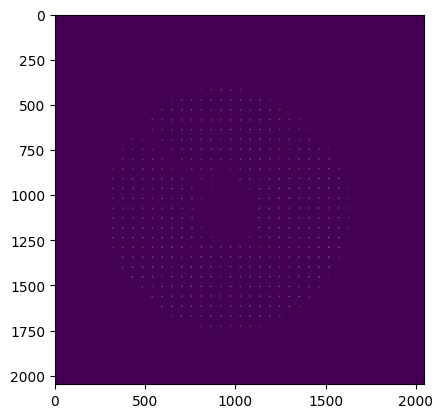

In [7]:
folder_path_sh = 'C:/Users/yiyan/OneDrive/Desktop/data/20250508/20250501_SHWFS/214838'
fits_files_sh = sorted(glob.glob(os.path.join(folder_path_sh, '*.fits')))

# Get the shape of the numpy array in 'fits' file
with fits.open(fits_files_sh[0]) as hdul:
    ref_shape = hdul[0].data.shape

# Initialize the numpy array used to save 'fits' data
c = len(fits_files_sh)
M, N = ref_shape
data_cube_sh = np.zeros((c, M, N), dtype=np.float32)

# Read all data
for i, file_path in enumerate(fits_files_sh):
    with fits.open(file_path) as hdul:
        data_cube_sh[i] = hdul[0].data

print(data_cube_sh.shape)

summed_image = np.sum(data_cube_sh, axis=0)
plt.imshow(summed_image)


# Read phase diversity data

[-400, -360, -320, -280, -240, -200, -160, -120, -80, -40, 0, 40, 80, 120, 160, 200, 240, 280, 320, 360, 400]
C:/Users/yiyan/OneDrive/Desktop/data/20250508/phase_diversity\-400.fits
C:/Users/yiyan/OneDrive/Desktop/data/20250508/phase_diversity\-360.fits
C:/Users/yiyan/OneDrive/Desktop/data/20250508/phase_diversity\-320.fits
C:/Users/yiyan/OneDrive/Desktop/data/20250508/phase_diversity\-280.fits
C:/Users/yiyan/OneDrive/Desktop/data/20250508/phase_diversity\-240.fits
C:/Users/yiyan/OneDrive/Desktop/data/20250508/phase_diversity\-200.fits
C:/Users/yiyan/OneDrive/Desktop/data/20250508/phase_diversity\-160.fits
C:/Users/yiyan/OneDrive/Desktop/data/20250508/phase_diversity\-120.fits
C:/Users/yiyan/OneDrive/Desktop/data/20250508/phase_diversity\-80.fits
C:/Users/yiyan/OneDrive/Desktop/data/20250508/phase_diversity\-40.fits
C:/Users/yiyan/OneDrive/Desktop/data/20250508/phase_diversity\0.fits
C:/Users/yiyan/OneDrive/Desktop/data/20250508/phase_diversity\+40.fits
C:/Users/yiyan/OneDrive/Desktop/

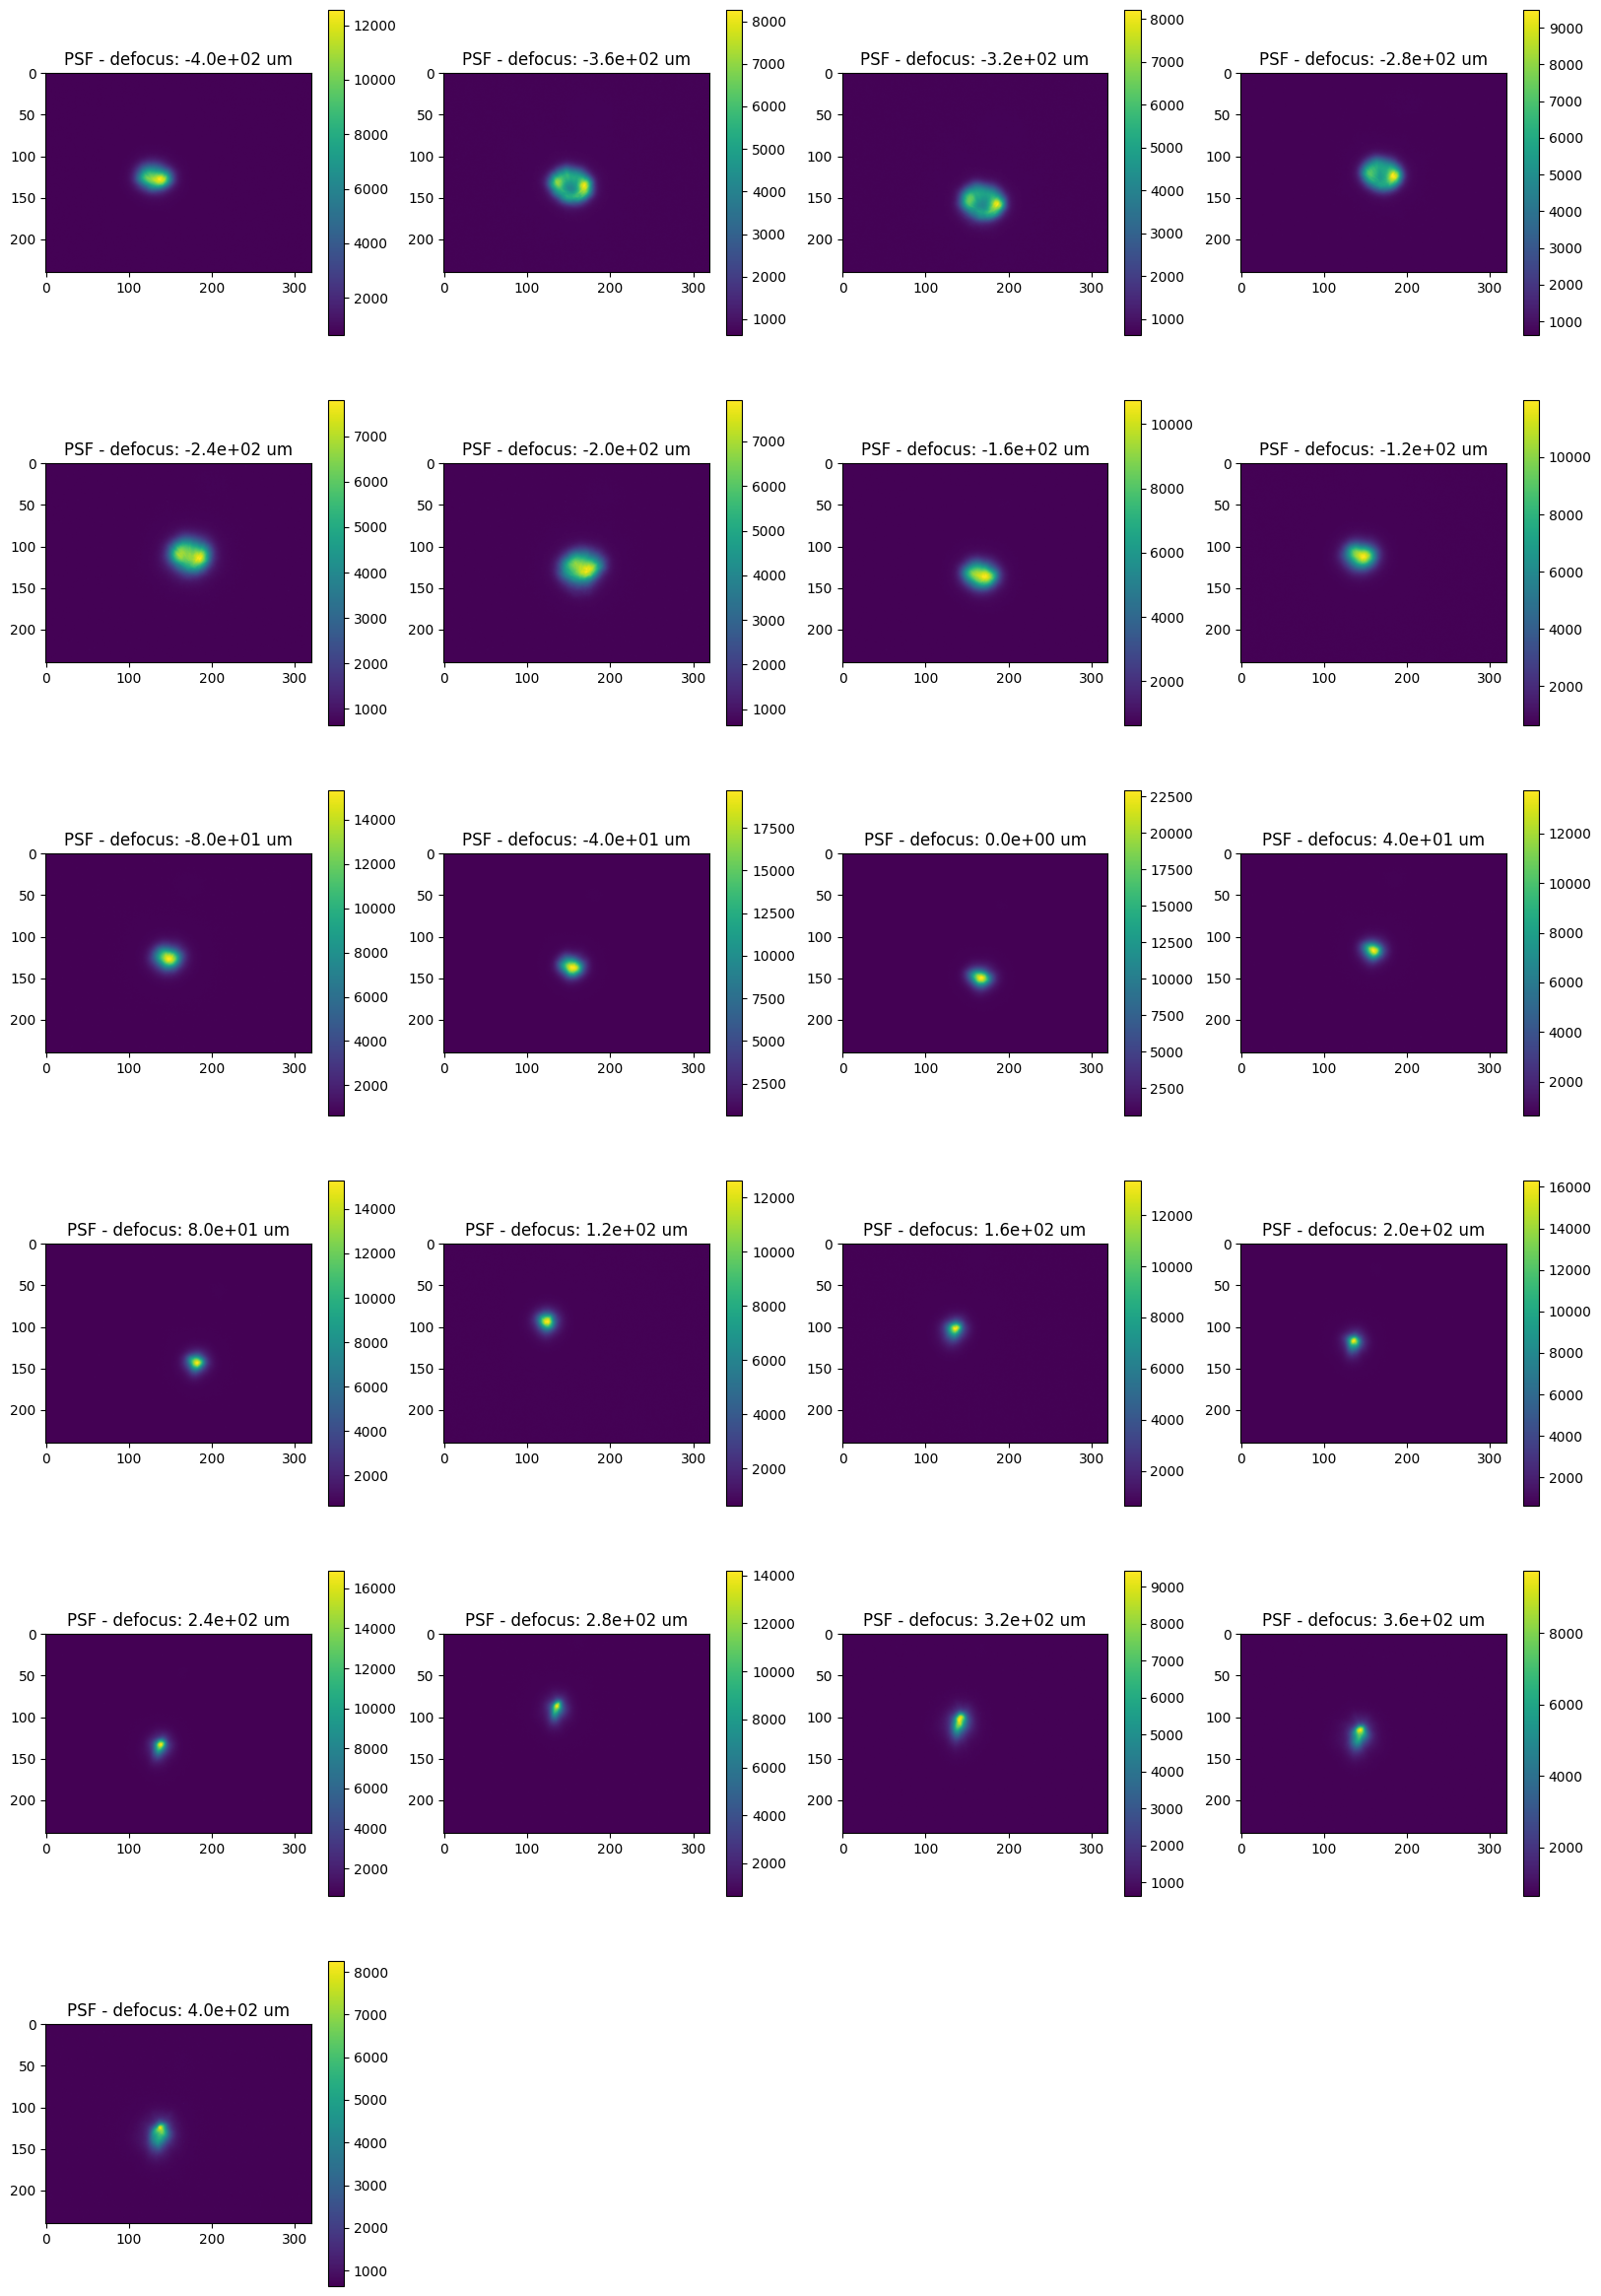

In [17]:
folder_path_pd = 'C:/Users/yiyan/OneDrive/Desktop/data/20250508/phase_diversity'
fits_files_pd = glob.glob(os.path.join(folder_path_pd, '*.fits'))

# Sort files
def extract_number(fpath):
    filename = os.path.basename(fpath)
    match = re.search(r'([-+]?\d+)', filename)
    return int(match.group()) if match else 0
fits_files_pd = sorted(fits_files_pd, key=extract_number)
file_labels = [extract_number(f) for f in fits_files_pd]
print(file_labels)

# Get the shape of the numpy array in 'fits' file
with fits.open(fits_files_pd[0]) as hdul:
    ref_shape = hdul[0].data.shape

# Initialize the numpy array used to save 'fits' data
c = len(fits_files_pd)
M, N = ref_shape
defocus_intensities = np.zeros((c, M, N), dtype=np.float32)

# Read all data
for i, file_path in enumerate(fits_files_pd):
    print(file_path)
    with fits.open(file_path) as hdul:
        defocus_intensities[i] = hdul[0].data
print(defocus_intensities.shape)

# Show all images
image_size = 5
col_num = 4 # column number of images for display
row_num = math.ceil(c / col_num) # row number of images for display
plt.figure(figsize=(image_size * col_num, image_size * row_num))
for i in range(c):
    position_info = file_labels[i] # defocus distance
    plt.subplot(row_num, col_num, i+1)
    plt.imshow(defocus_intensities[i])
    plt.title(f'PSF - defocus: {position_info:.1e} um')
    plt.colorbar()
plt.show()


# Generate spectrum

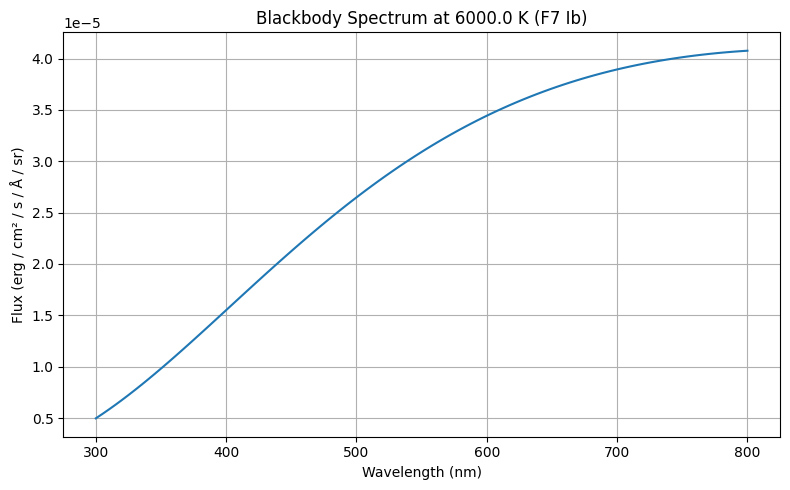

[300.         305.05050505 310.1010101  315.15151515 320.2020202
 325.25252525 330.3030303  335.35353535 340.4040404  345.45454545
 350.50505051 355.55555556 360.60606061 365.65656566 370.70707071
 375.75757576 380.80808081 385.85858586 390.90909091 395.95959596
 401.01010101 406.06060606 411.11111111 416.16161616 421.21212121
 426.26262626 431.31313131 436.36363636 441.41414141 446.46464646
 451.51515152 456.56565657 461.61616162 466.66666667 471.71717172
 476.76767677 481.81818182 486.86868687 491.91919192 496.96969697
 502.02020202 507.07070707 512.12121212 517.17171717 522.22222222
 527.27272727 532.32323232 537.37373737 542.42424242 547.47474747
 552.52525253 557.57575758 562.62626263 567.67676768 572.72727273
 577.77777778 582.82828283 587.87878788 592.92929293 597.97979798
 603.03030303 608.08080808 613.13131313 618.18181818 623.23232323
 628.28282828 633.33333333 638.38383838 643.43434343 648.48484848
 653.53535354 658.58585859 663.63636364 668.68686869 673.73737374
 678.787878

In [26]:
# Temperature of the star
temperature = 6000 * u.K

# Create the spectrum according to its temperature
bb = BlackBody(temperature=temperature)
wavelength = np.linspace(300, 800, 100) * u.nm
flux = bb(wavelength)

# Visualize the spectrum
plt.figure(figsize=(8,5))
plt.plot(wavelength.value, flux.value)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux (erg / cm² / s / Å / sr)')
plt.title(f'Blackbody Spectrum at {temperature.value} K (F7 Ib)')
plt.grid(True)
plt.tight_layout()
plt.show()

print(wavelength.value)

# Generate the pupil image

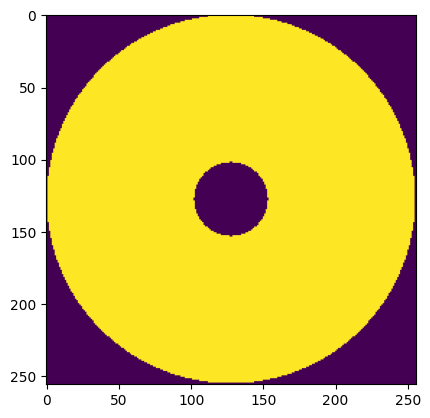

In [21]:
wavelength = 580e-9 # wavelength in meters
od_pupil = 0.3808 # outer pupil diameter in meters
id_pupil = 0.0762 # inner pupil diameter in meters
npix_pupil = 256 # sampling rate on a single side of the pupil

x = cp.linspace(-od_pupil / 2, od_pupil / 2, npix_pupil) # give a 1 x 512 vector in range [-d_pupil/2, d_pupil/2]
x, y = cp.meshgrid(x, x) # use 2 vectors to generate 2 mesh grids
r = cp.sqrt(x ** 2 + y ** 2) # radius

pupil = cp.ones_like(r) # create a matrix whose size and data format are similar to 'r' and value is 1
pupil[r >= od_pupil / 2] = 0 # update the pupil according to the positions obtained through 'r'
pupil[r <= id_pupil / 2] = 0

plt.imshow(pupil.get())
plt.show()


# Get OPD

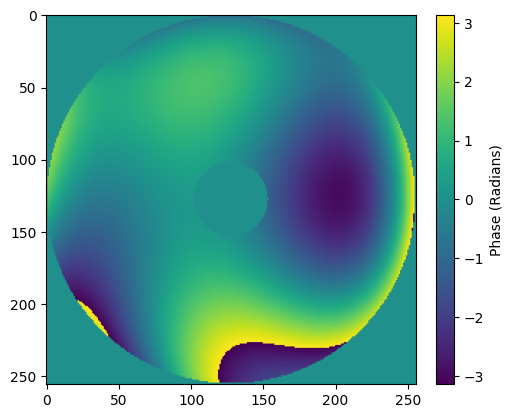

In [19]:
coeffs = cp.array([0.01, -0.02, 0.05, 0.05, 0.1, -0.1, 0.02, 0.1, -0.07, -0.03, 0.02, 0.1, 0.01, 0.05]) # coefficients of Zernike polynomials in wave number
coeff_num = len(coeffs)
zernikes = pp.zernike.arbitrary_basis(pupil, nterms=coeff_num, outside=0)

total_opd = np.sum(zernikes * coeffs[:, np.newaxis, np.newaxis], axis=0)
opd = np.exp(1j * total_opd * 2 * np.pi)

plt.imshow(np.angle(opd).get())
plt.colorbar(fraction=0.046, pad=0.04, label='Phase (Radians)')
plt.show()

# Get defocus probes

(100, 5, 256, 256)
100


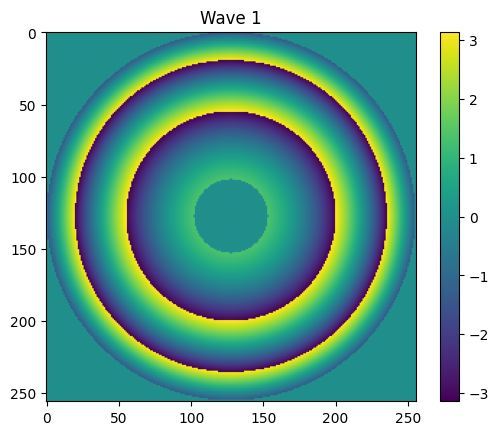

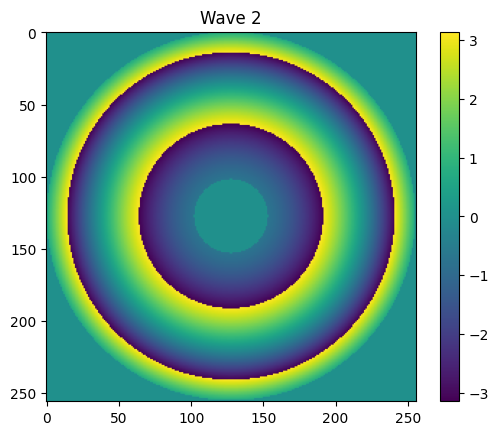

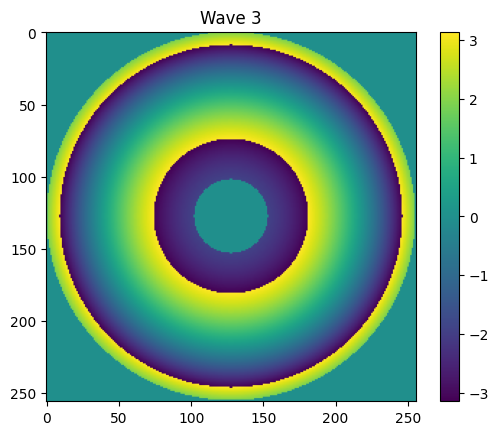

In [24]:
focal_length = 2.537 # focal length in meters
position = cp.array(file_labels) # defocus distances in microns
position = position * 1e-6 # in meters

wavelength = wavelength * 1e-9 # wavelength in meter
broadband_probes = [] # initialize a list to store probes for different wavelengths
for wl in wavelength:
    defocus_values = position/ (8 * wl * (focal_length / od_pupil) ** 2)  # defocus distance is calculated from L = 8Qλ(f/D)^2, so the defocus wave number can be inversely calculated through this
    probes = pr.get_defocus_probes(pupil, defocus_values)
    broadband_probes.append(probes)
broadband_probes = np.stack(broadband_probes, axis=0)
print(broadband_probes.shape) # get the shape of the broad band probes

wave_number = broadband_probes.shape[0] # wavelength layer
print(wave_number)

plt.imshow(np.angle(broadband_probes[0, 0]).get())
plt.colorbar()
plt.title('Wave 1')
plt.show()

plt.imshow(np.angle(broadband_probes[49, 0]).get())
plt.colorbar()
plt.title('Wave 2')
plt.show()

plt.imshow(np.angle(broadband_probes[99, 0]).get())
plt.colorbar()
plt.title('Wave 3')
plt.show()


# Simulate the PSF

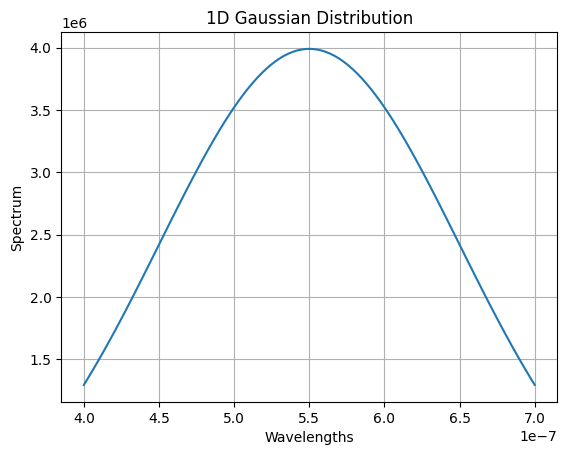

(100, 5, 256, 256)
(5, 256, 256)


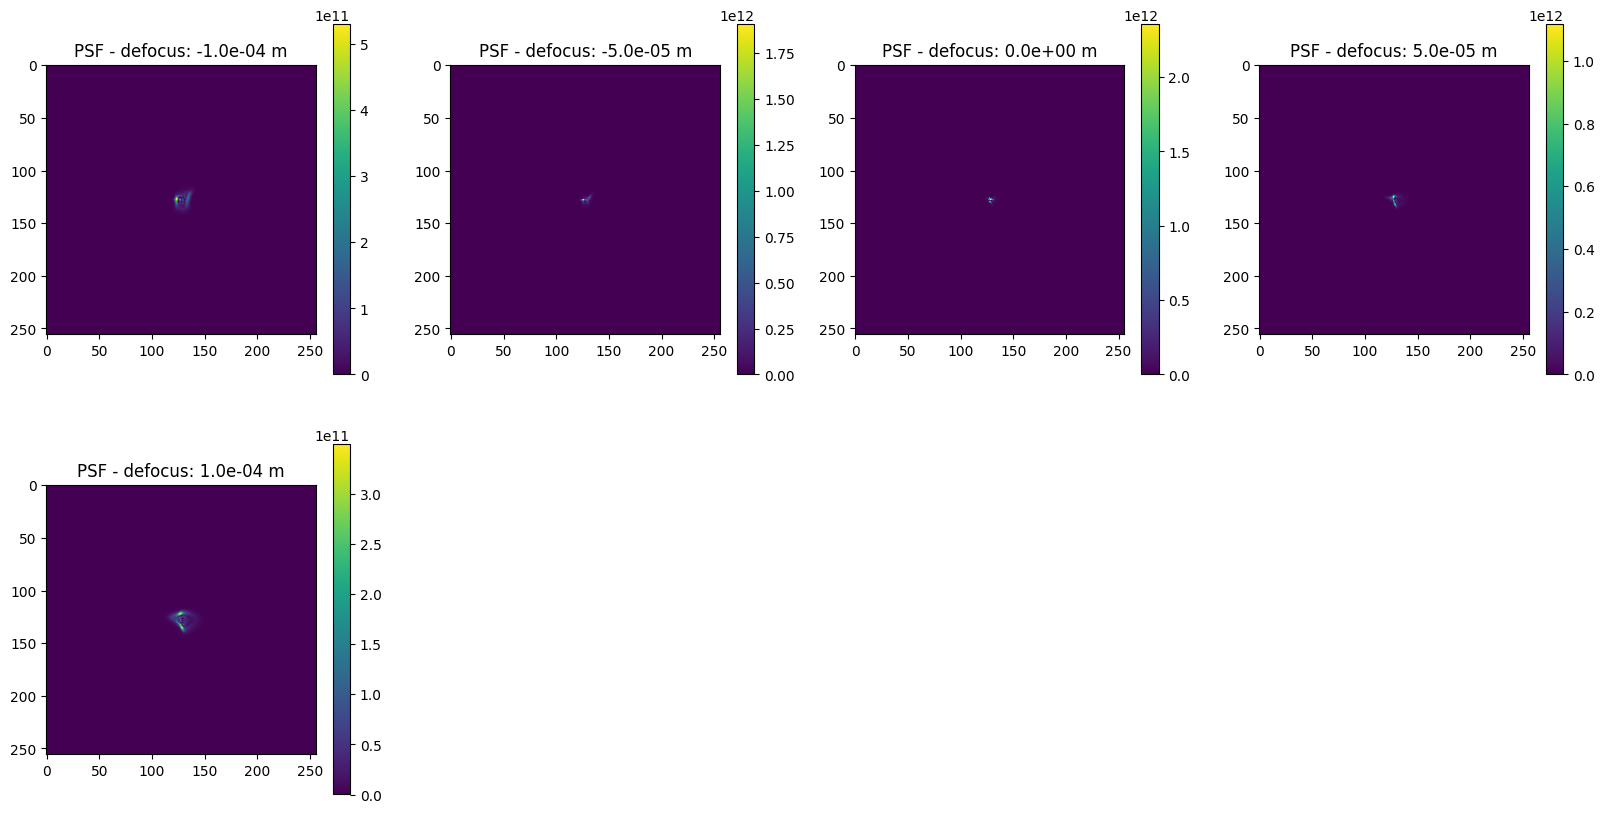

In [31]:
mu = 550e-9 # center
sigma = 1e-7 # width
spectrum = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(wavelength - mu)**2 / (2 * sigma**2))
plt.plot(wavelength, spectrum)
plt.title("1D Gaussian Distribution")
plt.xlabel("Wavelengths")
plt.ylabel("Spectrum")
plt.grid(True)
plt.show()

# Get PSF for each wavelength
spectrum = cp.asarray(spectrum)
broadband_intensities = []
for wl in wavelength:
    broadband_probes_wave = broadband_probes[wl, :, :, :]
    focal_intensities, _, _ = pr.forward_model(pupil, broadband_probes_wave, opd)
    broadband_intensities.append(focal_intensities)
broadband_intensities = np.stack(broadband_intensities, axis=0)
print(broadband_intensities.shape) # get the shape of the broadband intensities

# PSF of the broadband input
defocus_intensities = np.sum(broadband_intensities * spectrum[:, None, None, None], axis=0)
print(defocus_intensities.shape)

defocus_num = defocus_intensities.shape[0]
image_size = 5
col_num = 4 # column number of images for display
row_num = math.ceil(defocus_num / col_num) # row number of images for display
plt.figure(figsize=(image_size * col_num, image_size * row_num))
for i in range(defocus_num):
    position_info = position[i] # defocus distance
    plt.subplot(row_num, col_num, i+1)
    plt.imshow(defocus_intensities[i].get())
    plt.title(f'PSF - defocus: {position_info.get():.1e} m')
    plt.colorbar()
plt.show()


# Do phase retrieval


Imeas type: <class 'cupy.ndarray'>
fitmask type: <class 'cupy.ndarray'>
Eprobes type: <class 'cupy.ndarray'>
modes type: <class 'cupy.ndarray'>
<class 'cupy.ndarray'>


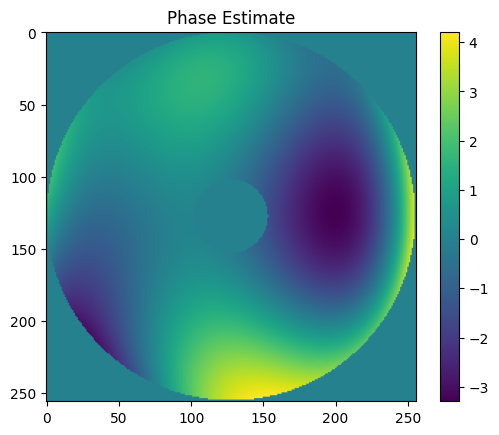

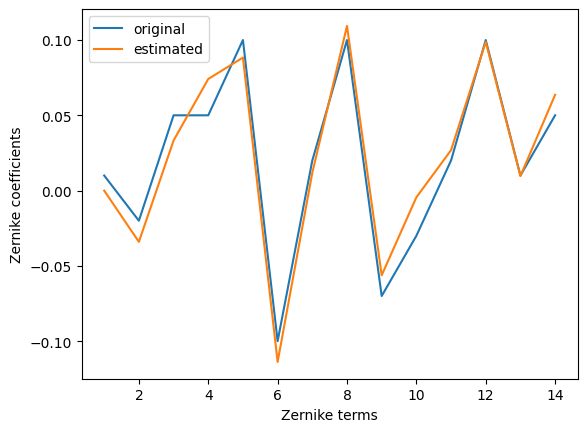

In [32]:
zernikes = pp.zernike.arbitrary_basis(pupil, nterms=coeff_num, outside=0) # give the bases of 45 zernike polynomials
single_probe = broadband_probes[49]
print("Imeas type:", type(defocus_intensities))
print("fitmask type:", type(pupil))
print("Eprobes type:", type(probes))
print("modes type:", type(zernikes))

phase_retrieval_dict = pr.run_phase_retrieval(Imeas=defocus_intensities, fitmask=pupil, Eprobes=single_probe, modes=zernikes, tol=1e-8, reg=0, wreg=1e3, fit_amp=False)
print(type(phase_retrieval_dict['fit_params']))
estimated_coeffs = phase_retrieval_dict['fit_params'] # returns in units of radians

np_phase = phase_retrieval_dict['phase_est'].get()
# np.save('phase_estimate.npy', np_phase)
plt.imshow(phase_retrieval_dict['phase_est'].get())
plt.colorbar()
plt.title('Phase Estimate')
# plt.savefig('Phase Estimate.png')
plt.show()

hori_axis = np.linspace(1, coeff_num, coeff_num, dtype=int)
original_coeffs = cp.asnumpy(coeffs)
estimate_coeffs = cp.asnumpy(estimated_coeffs[:coeff_num]) / (2 * cp.pi)

plt.plot(hori_axis, original_coeffs, label='original')
plt.plot(hori_axis, estimate_coeffs, label='estimated')
plt.legend()
plt.xlabel('Zernike terms')
plt.ylabel('Zernike coefficients')
plt.show()
